깃허브 자신의 계정에 수업과 숙제를 올린 소스코드만 참조가능
(그 외의 참조는 부정으로 간주 F처리)

데이터 로드
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data' columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'] data = pd.read_csv(url, names=columns)

데이터 확인
print(data.head())

해당 소스를 이용하여 ML 분류 RF, LR, DT

해당 소스를 이용하여 FCNN

해당 소스를 이용하여 CNN

모든 소스에는 F1값 및 confusion matrix 표시

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data' 
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'] 
df = pd.read_csv(url, names=columns)

In [3]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [7]:
# 

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['buying'] = label_encoder.fit_transform(df['buying'])
df['buying'].value_counts().sort_index()

df['maint'] = label_encoder.fit_transform(df['maint'])
df['maint'].value_counts().sort_index()

df['doors'] = label_encoder.fit_transform(df['doors'])
df['doors'].value_counts().sort_index()

df['persons'] = label_encoder.fit_transform(df['persons'])
df['persons'].value_counts().sort_index()

df['lug_boot'] = label_encoder.fit_transform(df['lug_boot'])
df['lug_boot'].value_counts().sort_index()

df['safety'] = label_encoder.fit_transform(df['safety'])
df['safety'].value_counts().sort_index()

df['class'] = label_encoder.fit_transform(df['class'])
df['class'].value_counts().sort_index()

class
0     384
1      69
2    1210
3      65
Name: count, dtype: int64

# 상관관계 행렬 그리기

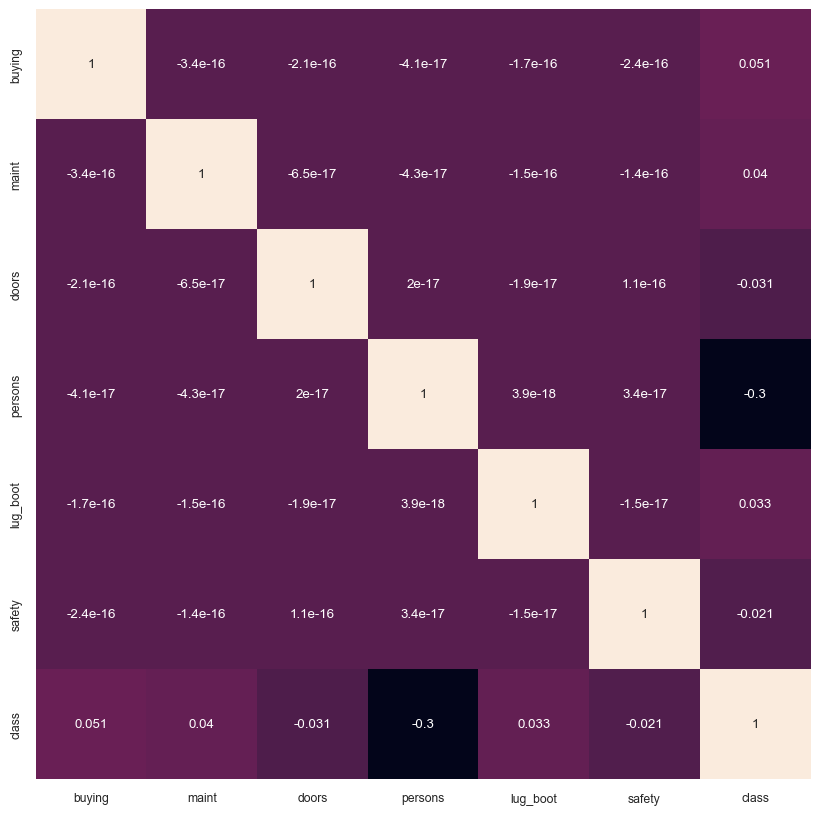

In [8]:
df_corr = df.corr() # 상관관계 행렬 

#히트맵
plt.figure(figsize=(10,10)) 
sns.set(font_scale=0.8)  
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

# 데이터 준비

In [9]:
X = df.drop('class', axis=1) 
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2


In [12]:
y = df['class']
y

0       2
1       2
2       2
3       2
4       2
       ..
1723    1
1724    3
1725    2
1726    1
1727    3
Name: class, Length: 1728, dtype: int32

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

## 데이터를 시퀀스 데이터로 변환하기

In [25]:
from collections import Counter
import numpy as np

def split_sequences(sequences, n_steps):
    X, y = list(), list()  # 빈 리스트를 생성하여 시퀀스 데이터와 레이블을 담을 공간을 만듦
    for i in range(len(sequences)):  # 전체 시퀀스 데이터를 순회
        # find the end of this pattern
        end_ix = i + n_steps  # 현재 인덱스(i)에서 n_steps만큼 떨어진 시퀀스의 끝을 계산
        # check if we are beyond the dataset
        if end_ix > len(sequences):  # 시퀀스 끝이 데이터의 범위를 넘어서는지 확인
            break  # 범위를 넘으면 루프 종료
        # gather input (X) and output parts (y)
        seq_x = sequences[i:end_ix, :-1]  # 입력 데이터 (특징 데이터)
        seq_y_values = sequences[i:end_ix, -1]  # 시퀀스 동안의 출력 데이터 (레이블들)
        
        # 가장 빈번하게 나온 레이블 찾기
        most_common_label = Counter(seq_y_values).most_common(1)[0][0]
        
        X.append(seq_x)  # 입력 데이터 추가
        y.append(most_common_label)  # 가장 많이 나온 레이블 추가
    
    return np.array(X), np.array(y)  # 리스트를 numpy 배열로 변환하여 반환

In [26]:
y_train = np.array(y_train)
train_set = np.c_[X_train, y_train]

y_test = np.array(y_test)
test_set = np.c_[X_test, y_test]

In [27]:
n_step = 3 

X_train, y_train = split_sequences(train_set, n_step)
print(X_train.shape, y_train.shape)

X_test, y_test = split_sequences(test_set, n_step)
print(X_test.shape, y_test.shape)

(1380, 3, 6) (1380,)
(344, 3, 6) (344,)


In [28]:
# 레이블 인코딩

from keras.utils import to_categorical

y_train = to_categorical(y_train) 
y_test = to_categorical(y_test) 

y_train.shape

(1380, 4)

## 모델 구축을 위해 shape 저장

In [29]:
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
print(n_timesteps, n_features, n_outputs)

3 6 4


# CNN 모델 구축 

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# cnn model vary kernel size
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from keras.utils import to_categorical

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPooling1D

In [30]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten
from keras.optimizers import Adam

# 모델 생성
model = Sequential()

# 1D CNN 층 추가
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)))
model.add(MaxPooling1D(pool_size=2, padding='same')) # padding='same' => 풀링을 진행해도 크기는 안 줄어들게 설정

model.add(Flatten())
# Dense 층 추가
model.add(Dense(128, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
epochs=30
history=model.fit(x=X_train, y=y_train, epochs=epochs, batch_size=32,validation_data= (X_test,y_test))


Epoch 1/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7863 - loss: 0.7877 - val_accuracy: 0.7994 - val_loss: 0.6140
Epoch 2/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8223 - loss: 0.5761 - val_accuracy: 0.7965 - val_loss: 0.5711
Epoch 3/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8086 - loss: 0.5497 - val_accuracy: 0.8023 - val_loss: 0.5547
Epoch 4/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8164 - loss: 0.5127 - val_accuracy: 0.8081 - val_loss: 0.5361
Epoch 5/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8255 - loss: 0.4983 - val_accuracy: 0.8052 - val_loss: 0.5379
Epoch 6/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8001 - loss: 0.5384 - val_accuracy: 0.7994 - val_loss: 0.5407
Epoch 7/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8138 - loss: 0.5064 - val_accuracy: 0.8081 - val_loss: 0.5190
Epoch 8/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8265 - loss: 0.4819 - val_accuracy: 0.7994 - val_loss

In [38]:
# 정확도 

model.evaluate(X_test, y_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7905 - loss: 0.5661 


[0.5511497259140015, 0.8081395626068115]

In [37]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix


y_pred = model.predict(X_test)

y_test_arg=np.argmax(y_test, axis=1)
y_pred_arg=np.argmax(y_pred, axis=1)

# 이진 분류 모델의 성능 평가 
# precision(클래스별 정확도), recall,f1-score(재현율, 균형), support(샘플 개수) 
print(classification_report(y_test_arg,y_pred_arg))
print(confusion_matrix(y_test_arg,y_pred_arg))

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
              precision    recall  f1-score   support

           0       0.56      0.18      0.27        55
           1       0.00      0.00      0.00         9
           2       0.83      0.97      0.90       275
           3       0.00      0.00      0.00         5

    accuracy                           0.81       344
   macro avg       0.35      0.29      0.29       344
weighted avg       0.75      0.81      0.76       344

[[ 10   1  44   0]
 [  1   0   8   0]
 [  4   3 268   0]
 [  3   0   2   0]]


C:\Users\tansy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tansy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tansy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
